In [1]:
import pymysql
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

In [2]:
import os

host_name = os.getenv('HOST_NAME')
passwd = os.getenv('AWS_PASSWORD')
user='group2'
database='group2db'

In [3]:
# Connecting AWS mysql Database
db = pymysql.connect(host_name, user, passwd, database)

In [4]:
cursor = db.cursor()

In [5]:
# Reading sql table for WEST into pandas DataFrame
west = pd.read_sql_query('''select * from tweets_locations where location IN ('Washington', 'Oregan', 'California', 'Montana', 'Idaho', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico') ''', db)

In [6]:
west.shape

(582, 3)

In [7]:
# Reading sql table for Mid WEST into pandas DataFrame
midwest = pd.read_sql_query('''select * from tweets_locations where location IN ('North Dakota', 'Minnesota', 'South Dakota', 'Iowa', 'Nebraska', 'Kansas', 'Missouri', 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio'
) ''', db)

In [8]:
midwest.shape

(482, 3)

In [9]:

# Reading sql table for South into pandas DataFrame
south = pd.read_sql_query('''select * from tweets_locations where location IN ('Oklahoma', 'Arkansas', 'Texas', 'Louisiana', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Maryland', 'Delaware', 'West Virginia', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida')
 ''', db)

In [10]:
south.shape

(968, 3)

In [11]:
# Reading sql table for EAST into pandas DataFrame
east = pd.read_sql_query('''select * from tweets_locations where location IN ('ME', 'Maine', 'NH', 'New Hampshire', 'VT', 'Vermont', 'MA', 'Massachusetts', 'CT', 'Connecticut', 'RI', 'Rhode Island', 'NY', 'New York', 'PA', 'Pennsylvania', 'NJ', 'New Jersey') ''', db)

In [12]:
east.shape

(856, 3)

In [13]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
#  Function to clean the tweets
def remove_punc(message):
    Test_punc_removed = [ char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    return Test_punc_removed_join

In [15]:
west['tweet'] = west['tweet'].apply(remove_punc)
midwest['tweet'] = midwest['tweet'].apply(remove_punc)
south['tweet'] = south['tweet'].apply(remove_punc)
east['tweet'] = east['tweet'].apply(remove_punc)

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','tweet','today','week','year', 'https','httpstco', 'rt', 'RT'])

In [17]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stop_words and len(token) >= 2:
            result.append(token)
    return result

In [18]:
west['tweet'] = west['tweet'].apply(preprocess).apply(lambda x: " ".join(x))
midwest['tweet'] = midwest['tweet'].apply(preprocess).apply(lambda x: " ".join(x))
south['tweet'] = south['tweet'].apply(preprocess).apply(lambda x: " ".join(x))
east['tweet'] = east['tweet'].apply(preprocess).apply(lambda x: " ".join(x))


In [19]:
# Function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating two new columns Subjectivity, Polarity
west['Subjectivity'] = west['tweet'].apply(getSubjectivity)
west['Polarity'] = west['tweet'].apply(getPolarity)

midwest['Subjectivity'] = midwest['tweet'].apply(getSubjectivity)
midwest['Polarity'] = midwest['tweet'].apply(getPolarity)

south['Subjectivity'] = south['tweet'].apply(getSubjectivity)
south['Polarity'] = south['tweet'].apply(getPolarity)

east['Subjectivity'] = east['tweet'].apply(getSubjectivity)
east['Polarity'] = east['tweet'].apply(getPolarity)

In [20]:
west

,tweet_id,tweet,location,Subjectivity,Polarity
0,3,prolife ass,Colorado,0.000000,0.000000
1,4,immunofever every single vaccination place nee...,Arizona,0.416667,0.238095
2,8,lisachristinect way line question man twofold ...,California,0.000000,0.000000
3,17,mailonline biontech strikes gold biotech compa...,Washington,0.566667,-0.133333
4,23,icklezoe trying hard fuck pandemic likely help,California,0.713889,-0.230556
...,...,...,...,...,...
577,3015,scampdog see running pcr tests cycles accuracy...,Arizona,0.545455,0.227273
578,3016,demand covid vaccine high local health departm...,Utah,0.360000,0.106667
579,3034,even best circumstances writes author rollout ...,Arizona,0.300000,1.000000
580,3036,westjournalism physician developed rare blood ...,Nevada,0.500000,0.133333


In [21]:
midwest

,tweet_id,tweet,location,Subjectivity,Polarity
0,6,mom called tell got covid vaccine got ran old ...,Michigan,0.200000,0.100000
1,19,straightforward always ken langone speaks facts,Minnesota,0.375000,0.375000
2,20,language effective reaching americans especial...,Michigan,0.622222,0.144444
3,24,usrebellion theyre prepping minds brainwashed ...,Michigan,0.517857,0.392857
4,27,charlesgaba update response govwhitmer,Wisconsin,0.000000,0.000000
...,...,...,...,...,...
477,3033,chicagotribune data released tuesday shows rou...,Illinois,0.377778,-0.050000
478,3035,nd dose covid vaccine kicked ass still noragrets,Minnesota,0.000000,0.000000
479,3044,biden plans release covid vaccine doses break ...,Illinois,0.000000,0.000000
480,3052,icymi new heritage hall ohiou opens doors covi...,Ohio,0.454545,0.136364


In [22]:
south

,tweet_id,tweet,location,Subjectivity,Polarity
0,7,mistresshicks needs covid vaccine httpstcopdh ...,Texas,0.000000,0.000000
1,11,joebiden folks received second dose covid vacc...,West Virginia,0.333333,0.270833
2,14,okprogressnow stitt skips right part number co...,Oklahoma,0.467857,0.067857
3,18,janicedean nygovcuomo may get away deadly marc...,Florida,0.625000,-0.300000
4,25,drdavidsamadi trump administration distributed...,South Carolina,1.000000,-0.500000
...,...,...,...,...,...
963,3045,cestephens louisiana administered doses covid ...,Louisiana,0.900000,0.500000
964,3046,highimpactflix wanted yet another excuse home ...,Florida,0.400000,0.375000
965,3050,sahanasrini make covid charge distributing cov...,Florida,0.600000,0.200000
966,3051,januarys rtp nsbe general body meeting virtual...,North Carolina,0.450000,0.025000


In [23]:
east

,tweet_id,tweet,location,Subjectivity,Polarity
0,2,ive trying sign yearold grandfather get covid ...,New York,0.000000,0.000000
1,5,wsj us officials suggest anyone preexisting co...,New York,0.800000,0.400000
2,9,ceuhungary ellismonk jadaliyya fatmamugegocek ...,Rhode Island,0.000000,0.000000
3,10,new jersey residents ages older eligible covid...,New Jersey,0.393939,0.151515
4,12,matryanelateach get covid vaccine parents seve...,Massachusetts,0.000000,0.000000
...,...,...,...,...,...
851,3047,doses covid vaccine administered county httpst...,New York,0.000000,0.000000
852,3049,known potential benefits product used diagnose...,Maine,0.833333,-0.166667
853,3056,new jersey residents ages older eligible covid...,New Jersey,0.393939,0.151515
854,3057,news waiting,New York,0.000000,0.000000


In [24]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return "Neutral"
    else:
        return 'Positive'

west['West Analysis'] = west['Polarity'].apply(getAnalysis)
midwest['MidWest'] = midwest['Polarity'].apply(getAnalysis)
south['South Analysis'] = south['Polarity'].apply(getAnalysis)
east['East Analysis'] = east['Polarity'].apply(getAnalysis)

In [25]:
west.head()

,tweet_id,tweet,location,Subjectivity,Polarity,West Analysis
0,3,prolife ass,Colorado,0.000000,0.000000,Neutral
1,4,immunofever every single vaccination place nee...,Arizona,0.416667,0.238095,Positive
2,8,lisachristinect way line question man twofold ...,California,0.000000,0.000000,Neutral
3,17,mailonline biontech strikes gold biotech compa...,Washington,0.566667,-0.133333,Negative
4,23,icklezoe trying hard fuck pandemic likely help,California,0.713889,-0.230556,Negative


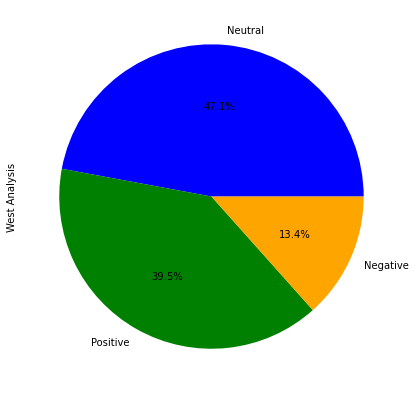

In [26]:
west['West Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['blue', 'green', 'orange'])

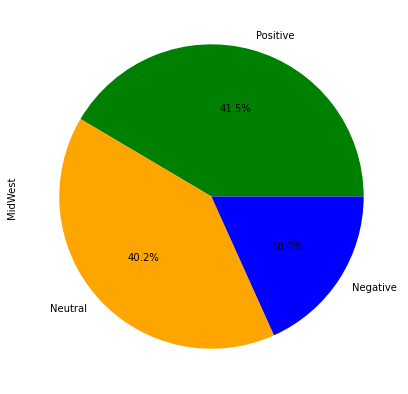

In [27]:
midwest['MidWest'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'orange', 'blue'])

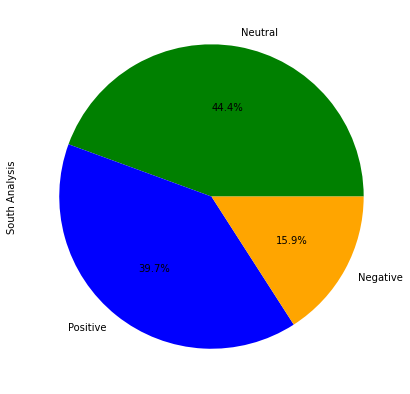

In [28]:
south['South Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'blue', 'orange'])

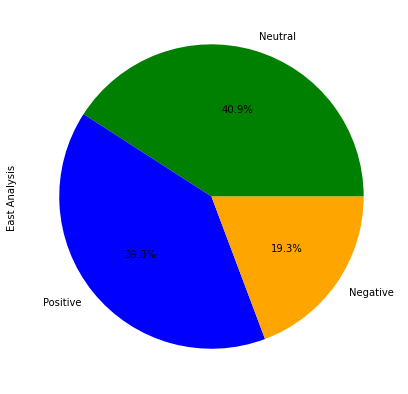

In [29]:
east['East Analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), colors=['green', 'blue', 'orange'])

In [30]:
df = pd.DataFrame({'West Analysis':west['West Analysis'], 'MidWest Analysis': midwest['MidWest'], 'South Analysis': south['South Analysis'], 'East Analysis': east['East Analysis']})
df.head()


,West Analysis,MidWest Analysis,South Analysis,East Analysis
0,Neutral,Positive,Neutral,Neutral
1,Positive,Positive,Positive,Positive
2,Neutral,Positive,Positive,Neutral
3,Negative,Positive,Negative,Positive
4,Negative,Neutral,Negative,Neutral


In [31]:
df.tail()

,West Analysis,MidWest Analysis,South Analysis,East Analysis
963,NaN,NaN,Positive,NaN
964,NaN,NaN,Positive,NaN
965,NaN,NaN,Positive,NaN
966,NaN,NaN,Positive,NaN
967,NaN,NaN,Neutral,NaN


In [32]:
df2 = df.apply(pd.value_counts)

In [33]:
df2

,West Analysis,MidWest Analysis,South Analysis,East Analysis
Negative,78,88,154,165
Neutral,274,194,430,350
Positive,230,200,384,341


In [34]:
# df2 = df2.rename(columns={'index':'Analysis'})

In [35]:
# df2

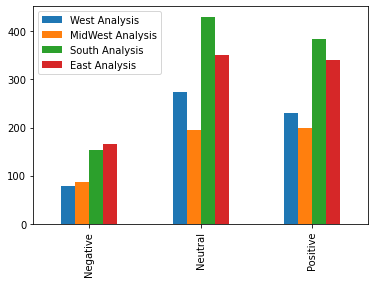

In [36]:
df2.plot(y=['West Analysis', 'MidWest Analysis', 'South Analysis', 'East Analysis'], kind='bar')

In [37]:
df3 = df2.T
df3

,Negative,Neutral,Positive
West Analysis,78,274,230
MidWest Analysis,88,194,200
South Analysis,154,430,384
East Analysis,165,350,341


In [38]:
df4 = df3.reset_index()
df4 = df4.rename(columns={'index':'USA REGIONS'})
df4

,USA REGIONS,Negative,Neutral,Positive
0,West Analysis,78,274,230
1,MidWest Analysis,88,194,200
2,South Analysis,154,430,384
3,East Analysis,165,350,341


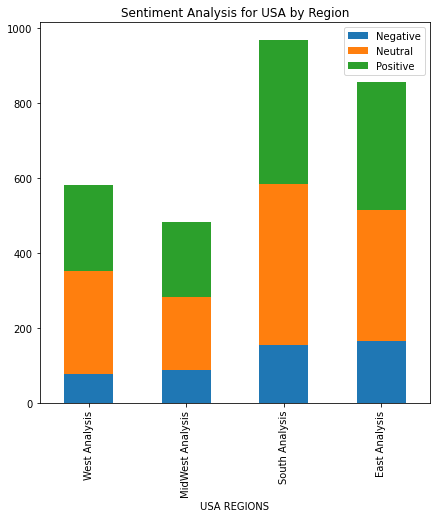

In [39]:
df4.plot(x='USA REGIONS', y=['Negative', 'Neutral', 'Positive'], 
                       kind='bar', stacked=True, 
                       title='Sentiment Analysis for USA by Region', figsize=(7,7))

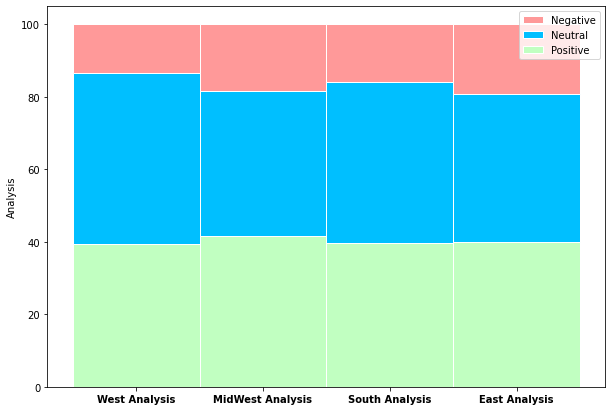

In [40]:
#Get values from the group and categories
x_axis = df4['USA REGIONS']
Negative = df4['Negative']
Neutral = df4['Neutral']
Positive = df4['Positive']
total = Negative + Neutral + Positive
# print(total)

proportion_Negative = np.true_divide(Negative, total) * 100
proportion_Neutral = np.true_divide(Neutral, total) * 100
proportion_Positive = np.true_divide(Positive, total) * 100
  
#add colors
colors = ['#FF9999', '#00BFFF','#C1FFC1']

# The position of the bars on the x-axis
r = range(len(x_axis))

barWidth = 1

#plot bars
plt.figure(figsize=(10, 7))
ax1 = plt.bar(r, proportion_Negative, bottom=proportion_Neutral+proportion_Positive, color=colors[0], edgecolor='white', width=barWidth, label="Negative")
ax2 = plt.bar(r, proportion_Neutral, bottom=proportion_Positive, color=colors[1], edgecolor='white', width=barWidth, label='Neutral')
ax3 = plt.bar(r, proportion_Positive, color=colors[2], edgecolor='white', width=barWidth, label='Positive')
plt.legend()
plt.xticks(r, x_axis, fontweight='bold')
plt.ylabel("Analysis")

plt.show()